In [1]:
#here I import all necessary libraries for project
import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/AliPakzad/Data-Analyst-Final-Portfolio-Project-Marketing-Analytics/main/marketing_data.csv"

df = pd.read_csv(url)

df.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

In [4]:
df.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
print(df.isna().sum())

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [6]:
df_clean = df.dropna()


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2216 non-null   int64 
 1   YearBirth            2216 non-null   int64 
 2   Education            2216 non-null   object
 3   MaritalStatus        2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   DtCustomer           2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProducts      2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWebPurch

In [8]:
df_clean.duplicated().sum()

np.int64(0)

In [9]:
df_clean.drop(columns=['id'],  inplace = True)

In [10]:
df_clean.Education.value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [11]:
df_clean.MaritalStatus.value_counts()

,count
MaritalStatus,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
YOLO,2
Absurd,2


In [12]:
df_clean.Country.value_counts()

,count
Country,
SP,1093
SA,337
CA,266
AUS,147
IND,147
GER,116
US,107
ME,3


In [13]:
df_clean.Complain.value_counts()

,count
Complain,
0,2195
1,21


In [14]:
df_clean.DtCustomer.value_counts()

,count
DtCustomer,
8/31/12,12
9/12/12,11
5/12/14,11
2/14/13,11
8/20/13,10
...,...
9/19/12,1
6/6/14,1
5/25/13,1


In [15]:
# convert Date of customer's enrollment with the company into Python Date time object
df_clean["DtCustomer"]= pd.to_datetime(df_clean["DtCustomer"])
df_clean.DtCustomer.value_counts()

,count
DtCustomer,
2012-08-31,12
2012-09-12,11
2014-05-12,11
2013-02-14,11
2013-08-20,10
...,...
2012-09-19,1
2014-06-06,1
2013-05-25,1


In [16]:
df_clean['Income'] = df_clean['Income'].str.replace('$', "")
df_clean['Income'] = df_clean['Income'].str.replace(',', "").astype(float)

In [17]:
df_clean.Income.value_counts()

,count
Income,
7500.0,12
35860.0,4
63841.0,3
67445.0,3
48432.0,3
...,...
64590.0,1
41154.0,1
66973.0,1


In [18]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
currentYear = date.year

print(f"Current Year -> {currentYear}")

df_clean['Age']= currentYear - df_clean['YearBirth']


df_clean['Age'].head()

Current Year -> 2025


,Age
0,55
1,64
2,67
3,58
4,36


In [19]:
df_clean['ChildrenHome'] = df_clean['Kidhome'] + df_clean['Teenhome']

df_clean['ChildrenHome'].head()

,ChildrenHome
0,0
1,0
2,1
3,2
4,1


In [20]:
#Number of Years of being a Customer
df_clean["NumYearCustomer"] = currentYear - df_clean["DtCustomer"].apply(lambda x: x.year)

df_clean["NumYearCustomer"]

,NumYearCustomer
0,11
1,11
2,11
3,11
4,11
...,...
2235,12
2236,12
2237,13
2238,13


In [21]:
df_clean['TotalSpending']= df_clean['MntWines']+df_clean['MntFruits'] + df_clean['MntMeatProducts'] \
                          +df_clean['MntFishProducts']+df_clean['MntSweetProducts']+df_clean['MntGoldProducts']

df_clean['TotalSpending'].head()


,TotalSpending
0,1190
1,577
2,251
3,11
4,91


In [22]:
df_clean['TotalNumPurchases'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] +\
                             df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

df_clean['TotalNumPurchases'].head()

,TotalNumPurchases
0,15
1,18
2,11
3,4
4,8


In [23]:
df_clean['TotalAcceptedCmp'] = df_clean['AcceptedCmp1'] + df_clean['AcceptedCmp2'] + df_clean['AcceptedCmp3'] \
                             + df_clean['AcceptedCmp4'] + df_clean['AcceptedCmp5'] + df_clean['Response']

df_clean['TotalAcceptedCmp'].head()

,TotalAcceptedCmp
0,1
1,2
2,0
3,0
4,2


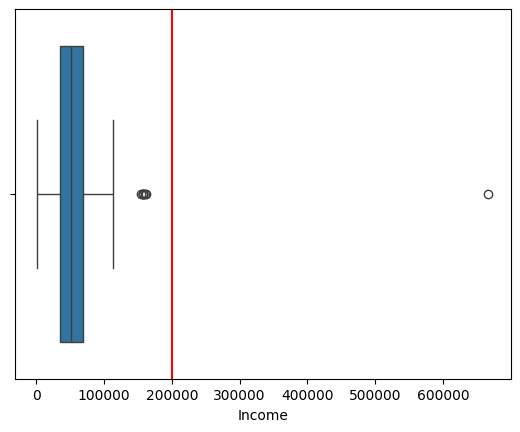

In [24]:
sns.boxplot(x= df_clean["Income"])

plt.axvline(x=200000, color ='red')

plt.show()

In [25]:
df_clean = df_clean[df_clean['Income']<200000]

len(df_clean)

2215

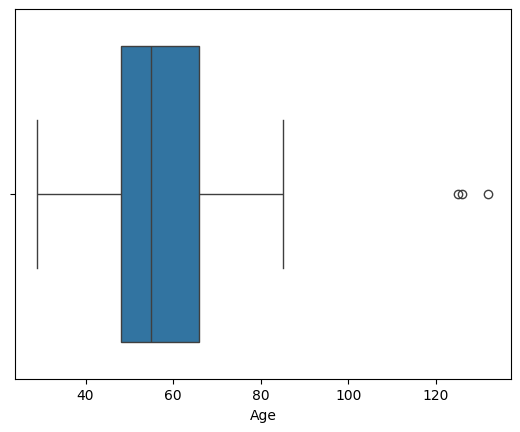

In [26]:
sns.boxplot(x=df_clean["Age"])

plt.show()

In [27]:
df_clean = df_clean[df_clean['Age']<100]

len(df_clean)

2212

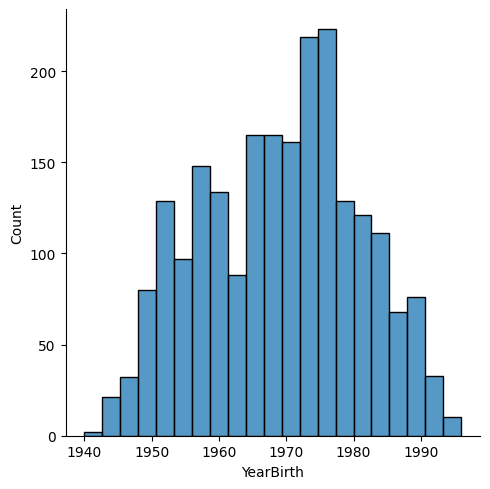

In [28]:
sns.displot(x=df_clean['YearBirth'])
plt.show()

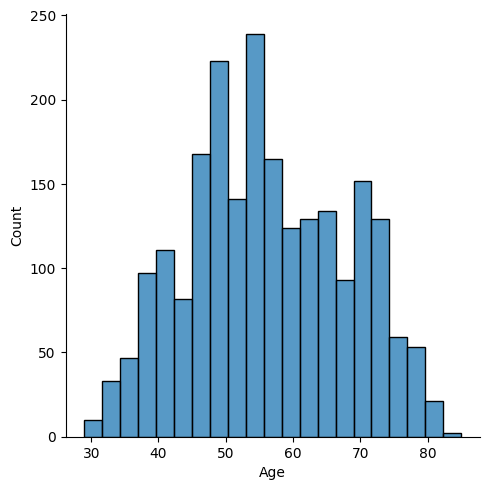

In [29]:
sns.displot(x=df_clean['Age'])
plt.show()

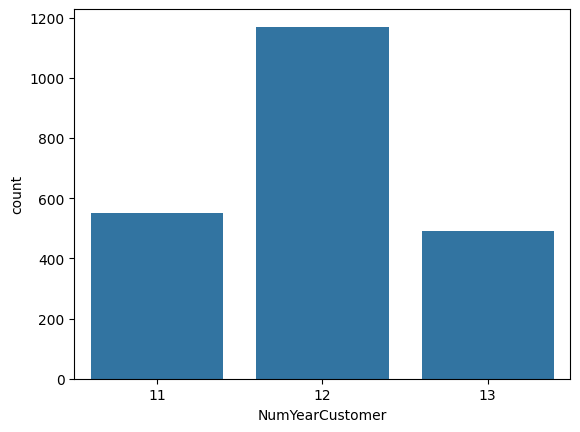

In [30]:
sns.countplot(x=df_clean['NumYearCustomer'])
plt.show()

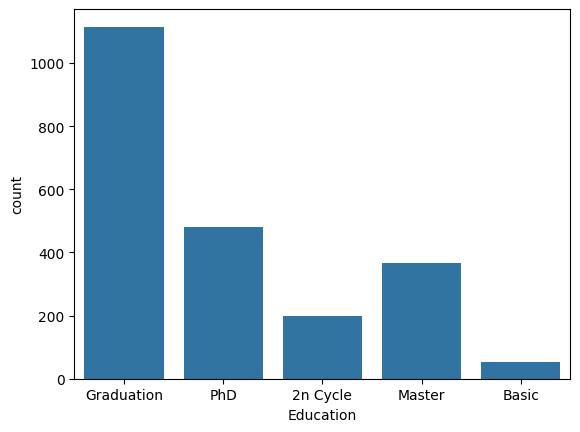

In [31]:
chart = sns.countplot(x=df_clean['Education'])

plt.show()

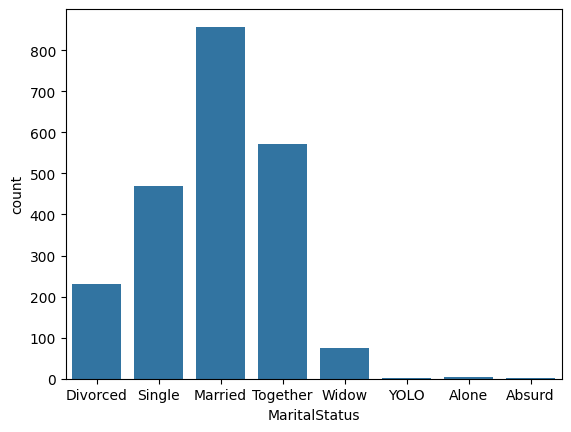

In [32]:
chart = sns.countplot(x=df_clean['MaritalStatus'])

plt.show()

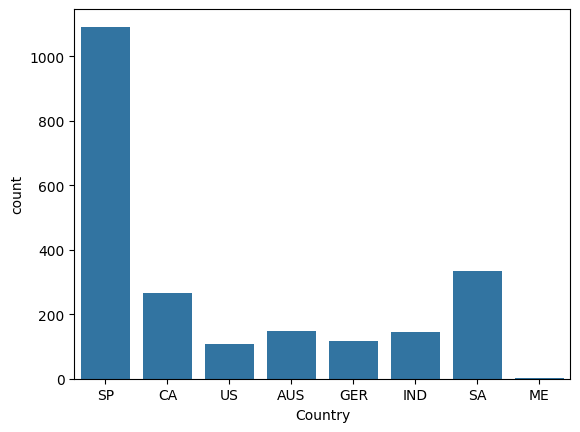

In [33]:
sns.countplot(x=df_clean['Country'])

plt.show()

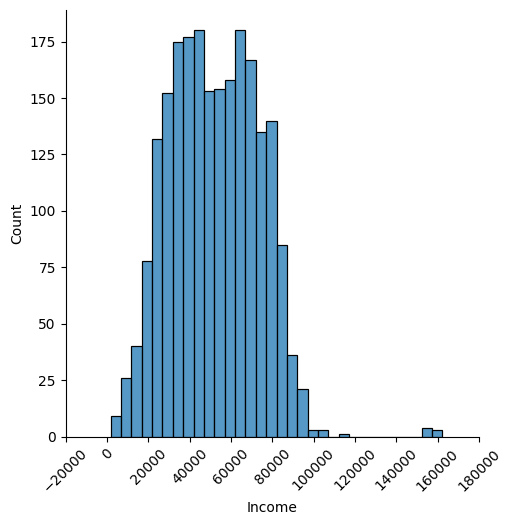

In [34]:
chart = sns.displot(x=df_clean['Income'])

chart.set_xticklabels(rotation=45)

plt.show()

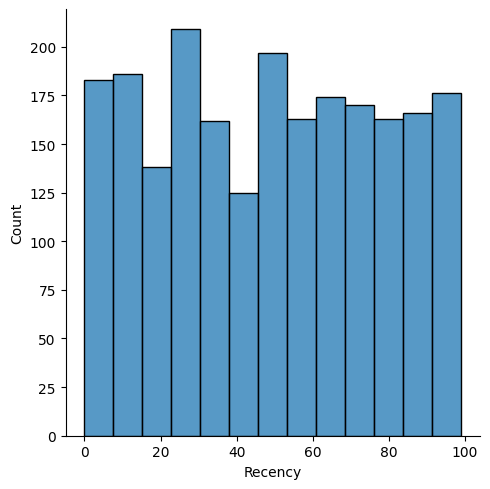

In [35]:
sns.displot(x=df_clean['Recency'])

plt.show()

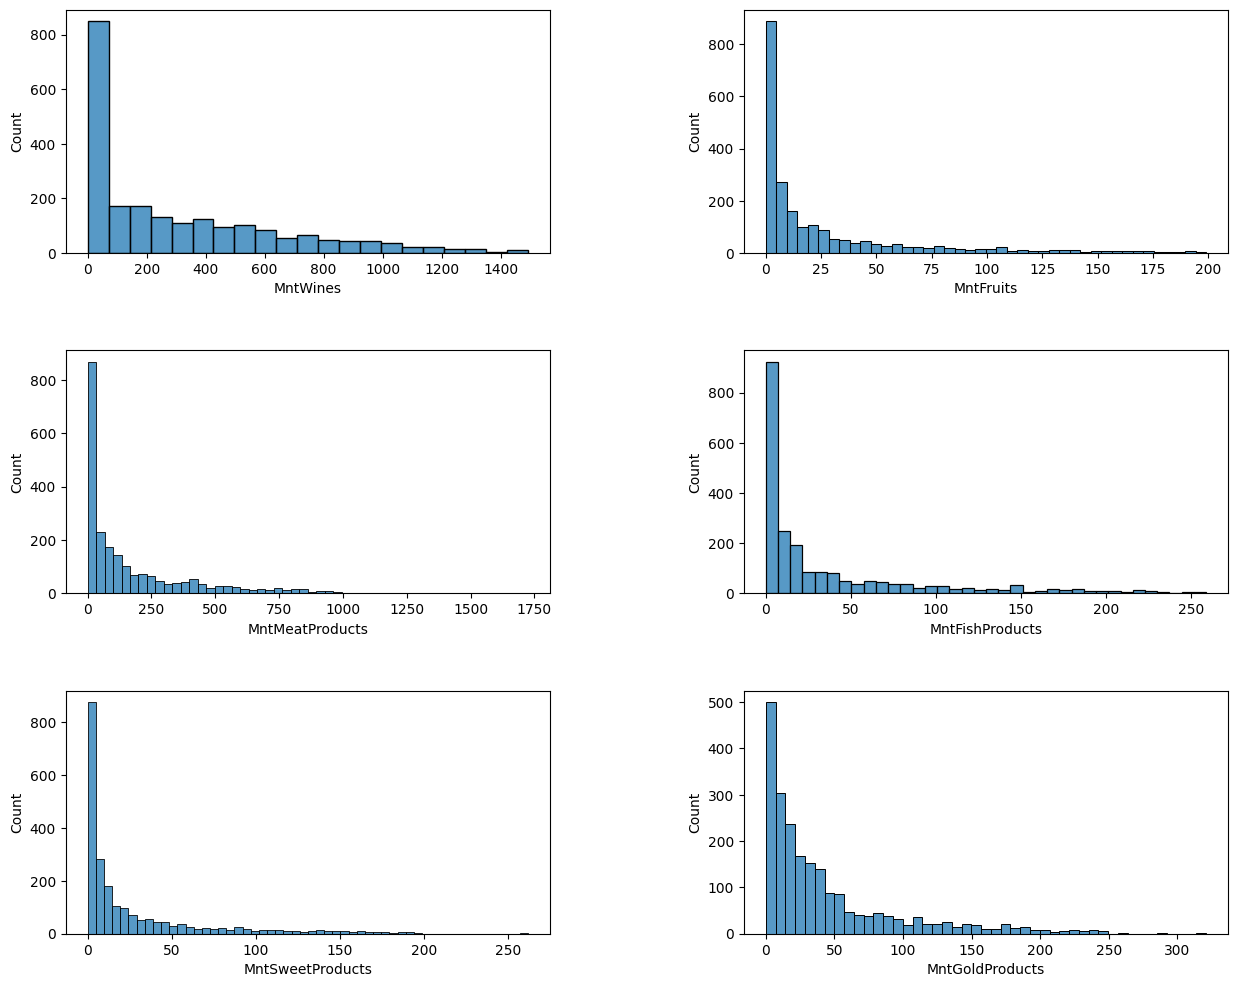

In [36]:
cols =  ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
size = len(cols)

fig = plt.figure(figsize = (15, 12))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(3, 2, i+1)
    sns.histplot(df_clean[cols[i]])
plt.show()

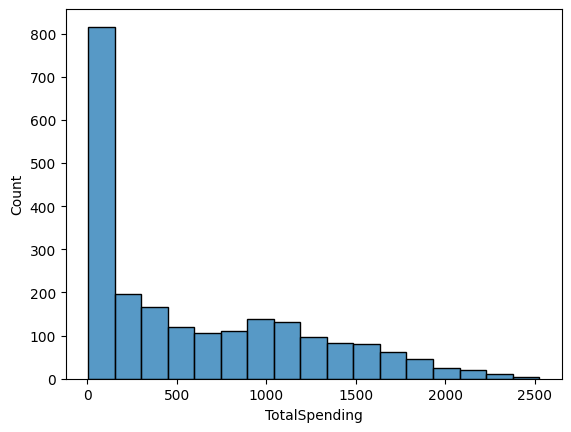

In [37]:
sns.histplot(df_clean['TotalSpending'])

plt.show()

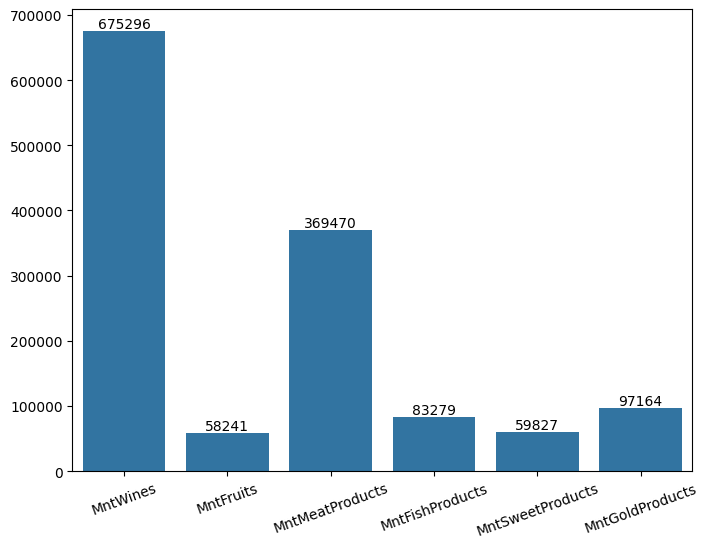

In [38]:
fig = plt.figure(figsize = (8, 6))

amount_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']

sr = df_clean[amount_cols].sum()

chart = sns.barplot(x= list(sr.index), y= list(sr.values))

chart.set_xticklabels(labels = list(sr.index), rotation=20)
chart.bar_label(chart.containers[0])

plt.show()

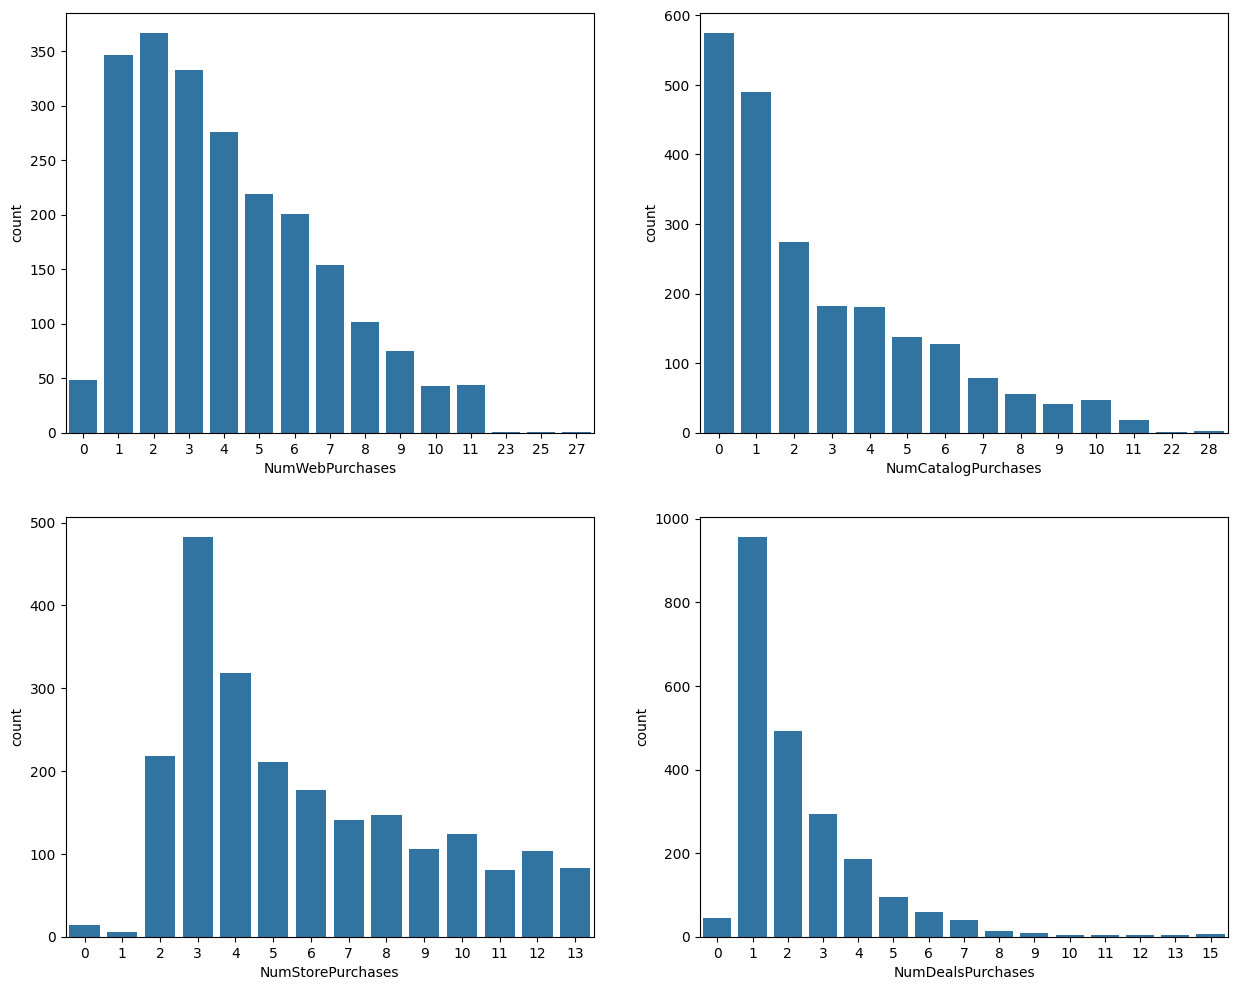

In [39]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

size = len(cols)

fig = plt.figure(figsize = (15, 12))

for i in range(0,size):
    plt.subplot(2, 2, i+1)
    sns.countplot(x= df_clean[cols[i]])
plt.show()

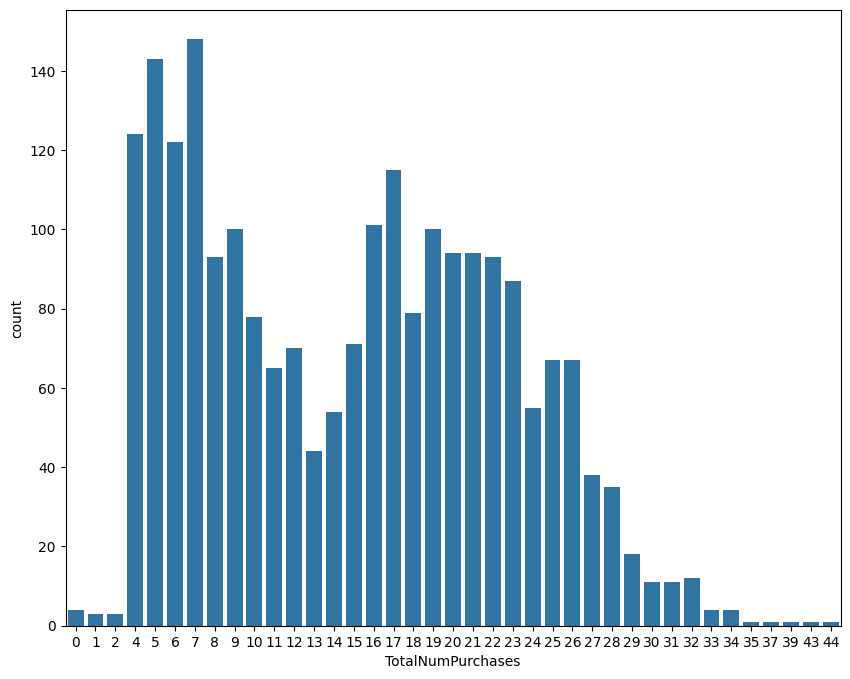

In [40]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(x= df_clean['TotalNumPurchases'])

plt.show()

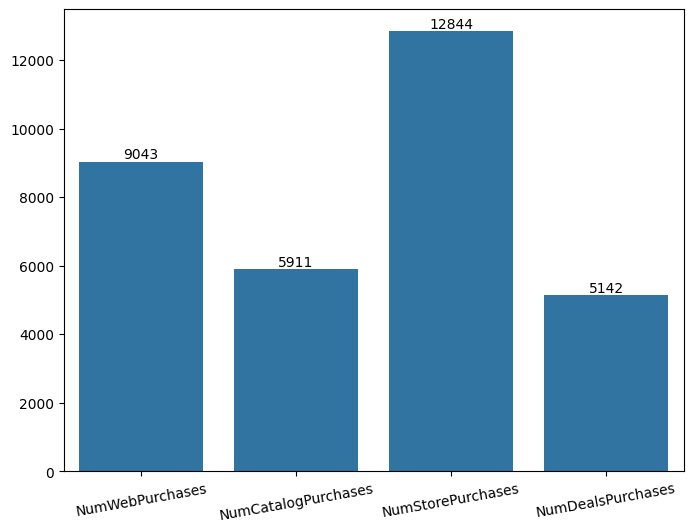

In [41]:
fig = plt.figure(figsize = (8, 6))

Num_Purchases_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

sr = df_clean[Num_Purchases_cols].sum()

chart = sns.barplot(x= list(sr.index), y= list(sr.values))

chart.set_xticklabels(labels = list(sr.index), rotation=10)
chart.bar_label(chart.containers[0])

plt.show()

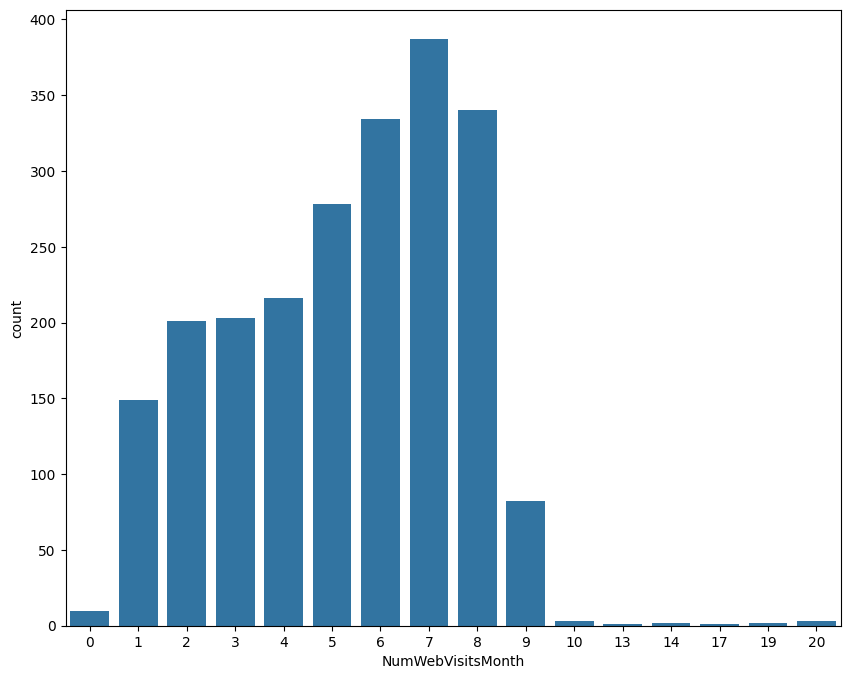

In [42]:
fig = plt.figure(figsize = (10, 8))

sns.countplot(x= df_clean['NumWebVisitsMonth'])

plt.show()

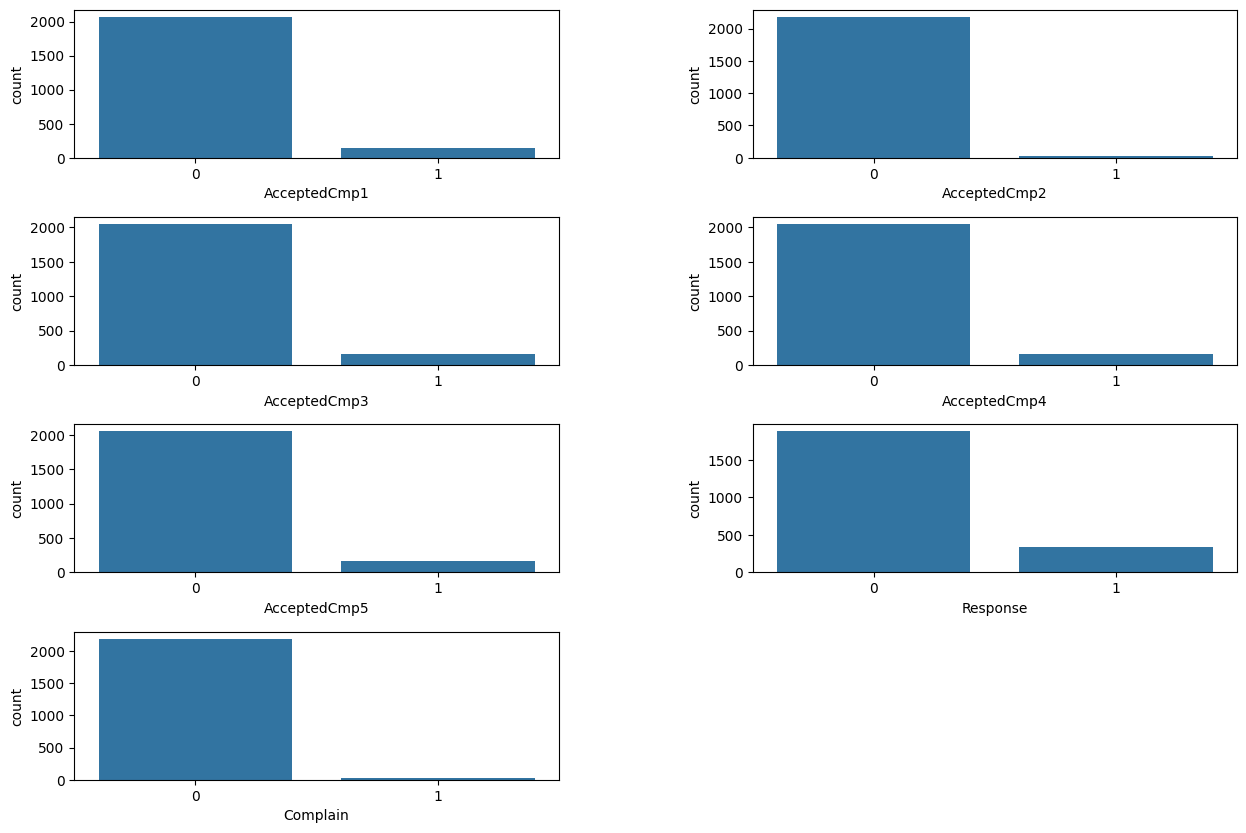

In [43]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
size = len(cols)

fig = plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(4, 2, i+1)
    sns.countplot(x= df_clean[cols[i]])
plt.show()

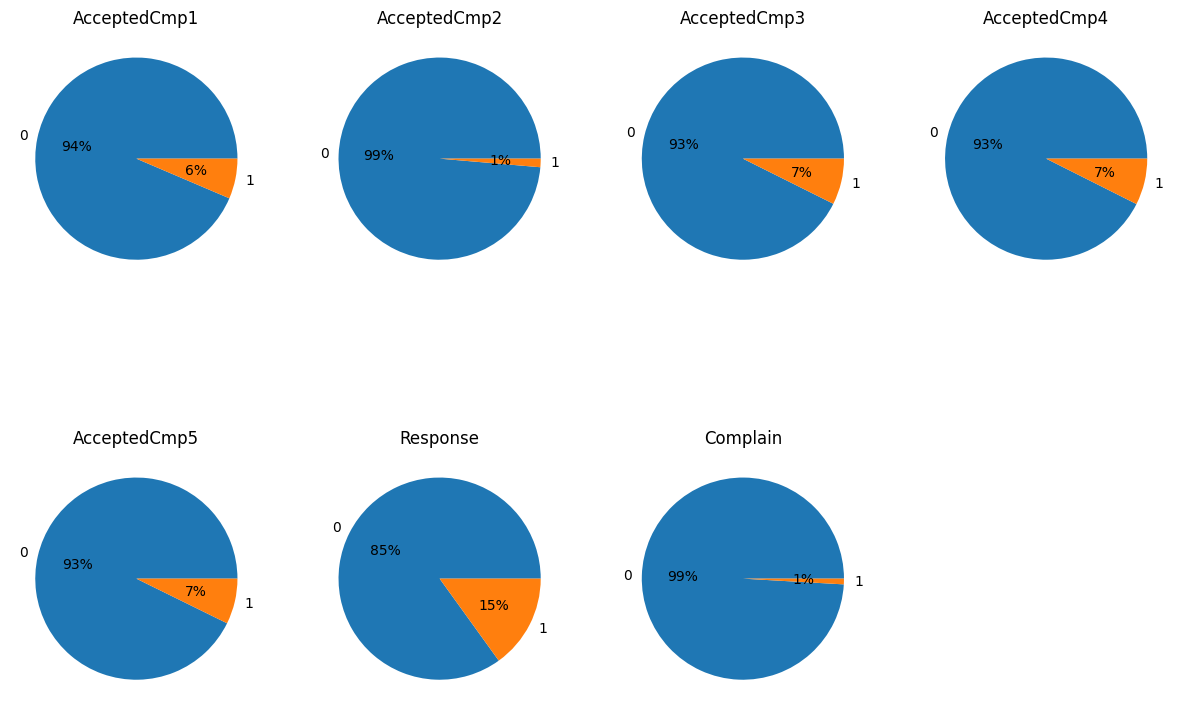

In [45]:
cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']
size = len(cols)

fig = plt.figure(figsize = (15, 10))

for i in range(0,size):
    plt.subplot(2, 4, i+1)
    plt.title(cols[i])
    data = df_clean[cols[i]].value_counts()
    plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.show()

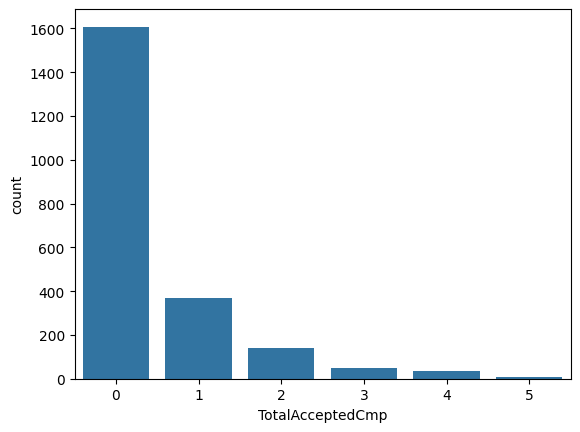

In [46]:
sns.countplot(x= df_clean['TotalAcceptedCmp'])

plt.show()

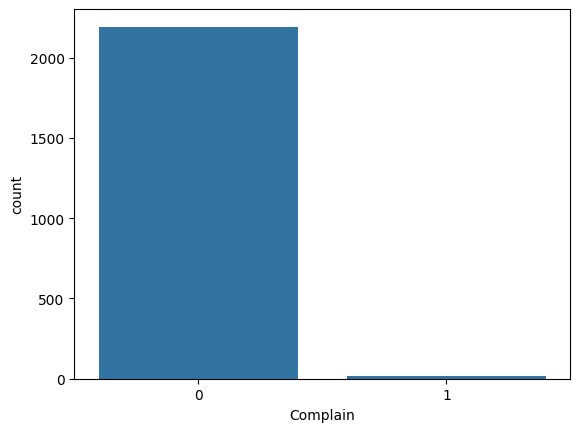

In [47]:
sns.countplot(x= df_clean['Complain'])

plt.show()

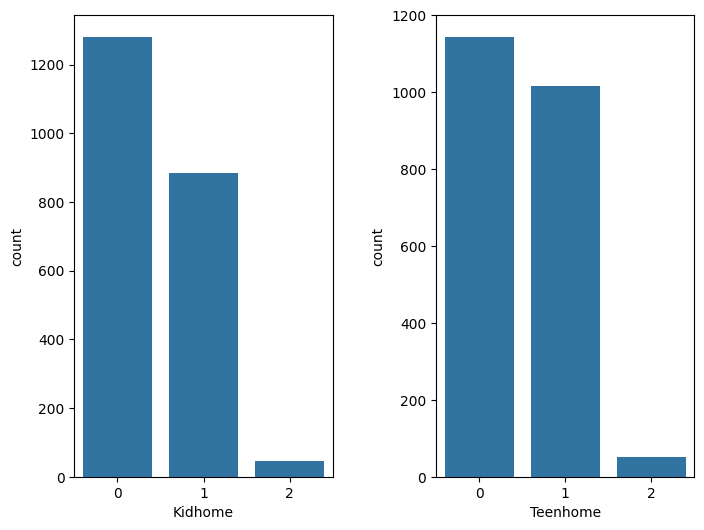

In [48]:
cols = ['Kidhome', 'Teenhome']
size = len(cols)

fig = plt.figure(figsize = (8, 6))

plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)

for i in range(0,size):
    plt.subplot(1, 2, i+1)
    sns.countplot(x= df_clean[cols[i]])
plt.show()

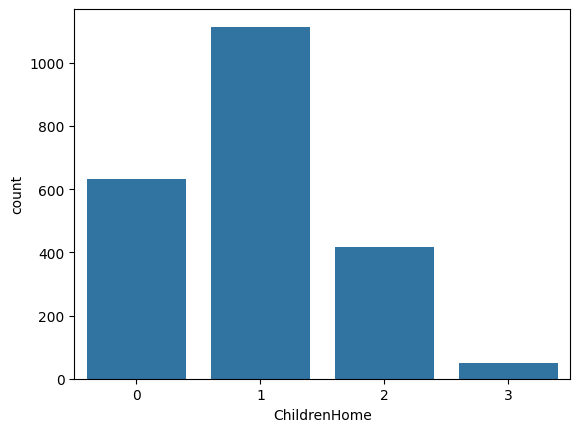

In [49]:
sns.countplot(x= df_clean['ChildrenHome'])

plt.show()

In [50]:
df_clean.describe()

,YearBirth,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,ChildrenHome,NumYearCustomer,TotalSpending,TotalNumPurchases,TotalAcceptedCmp
count,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,0.441682,0.505877,2013-07-10 06:51:25.714285824,49.019439,305.287523,26.329566,167.029837,37.648734,...,0.064195,0.013562,0.150542,0.009042,56.086347,0.947559,11.971971,607.268083,14.891501,0.448915
min,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,11.000000,5.000000,0.000000,0.000000
25%,1959.000000,35233.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,12.000000,69.000000,8.000000,0.000000
50%,1970.000000,51371.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,175.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,12.000000,397.000000,15.000000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,66.000000,1.000000,12.000000,1048.000000,21.000000,1.000000
max,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,85.000000,3.000000,13.000000,2525.000000,44.000000,5.000000
std,11.701599,21527.278844,0.536955,0.544253,NaN,28.943121,337.322940,39.744052,224.254493,54.772033,...,0.245156,0.115691,0.357683,0.094678,11.701599,0.749466,0.685926,602.513364,7.671629,0.893017


In [51]:
df_clean.mean(numeric_only=True)

,0
YearBirth,1968.913653
Income,51958.810579
Kidhome,0.441682
Teenhome,0.505877
Recency,49.019439
MntWines,305.287523
MntFruits,26.329566
MntMeatProducts,167.029837
MntFishProducts,37.648734
MntSweetProducts,27.046564


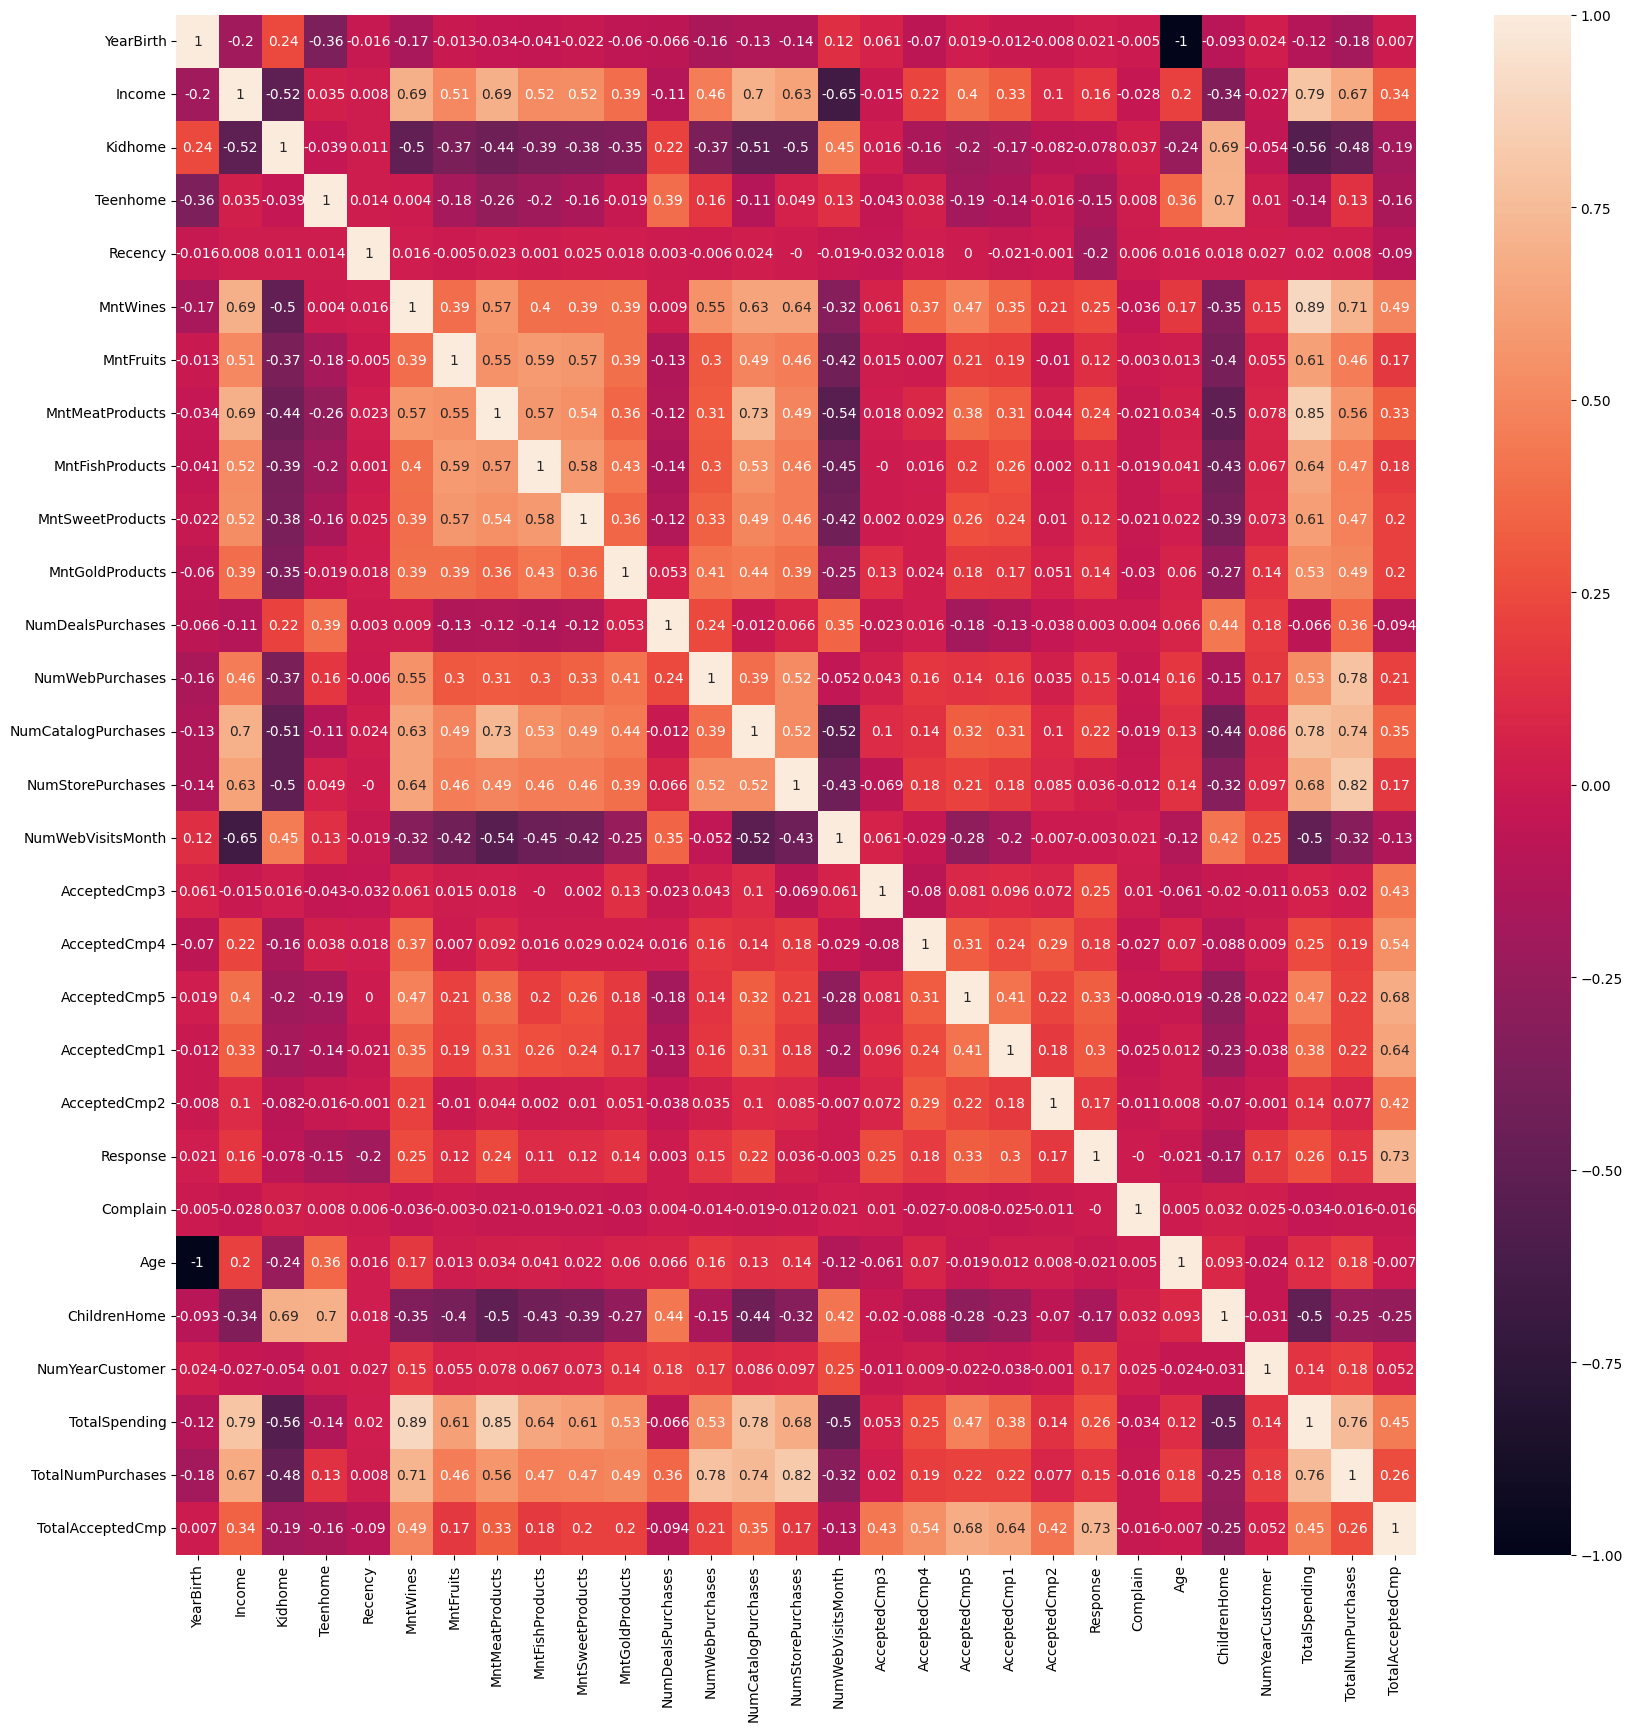

In [52]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(numeric_only=True).round(3), annot=True)
plt.show()